In [299]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [300]:
train_tweets = pd.read_csv('train_tweets.csv')

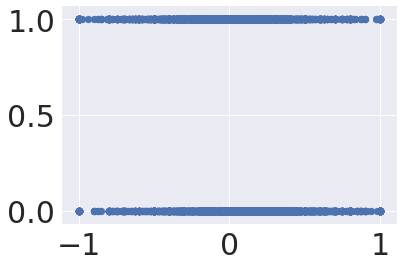

In [289]:
from textblob import TextBlob
sentiment = []
for tweet in train_tweets['text']:
    
     # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    tweetiment = analysis.sentiment.polarity
        # set sentiment 
    #if analysis.sentiment.polarity > 0: 
    #    tweetiment =  'positive'
    #elif analysis.sentiment.polarity == 0: 
    #    tweetiment = 'neutral'
    #else: 
    #    tweetiment = 'negative'
    sentiment.append(tweetiment)
train_tweets['sentiment'] = sentiment


In [301]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [302]:
train_tweets = (train_tweets.drop_duplicates(subset='text'))
apple_tweets = train_tweets[train_tweets['source'].isin(['@Apple','@AppleSupport'])]
train_tweets = train_tweets[~train_tweets['source'].isin(['@Apple','@AppleSupport'])]
len(apple_tweets)
len(train_tweets)

23880

In [303]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
train_tweets.loc[:,"tokens"] = train_tweets.loc[:,"text"].apply(tokenizer.tokenize)

In [304]:
data_words = train_tweets['tokens'][:]


In [305]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0:10]]])

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.P

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/home/rcarns/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

In [306]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [307]:
train_tweets['tokens'] = trigram_mod[bigram_mod[train_tweets['tokens']]]

In [308]:
train_tweets['tokens'][:10]
train_tweets['trigram_text'] = train_tweets['tokens'].apply(' '.join)
train_tweets['trigram_text'][:10]
#' '.join(train_tweets['tokens'][0])

#train_tweets = train_tweets[train_tweets['trigram_text'].str.contains('apple')==False]
#train_tweets = train_tweets[train_tweets['trigram_text'].str.contains('itunes')==False]

0    i_would_like to work at but am going_to need_t...
1    when_you send the hubby in target for a glass ...
2    thanks thanks 4 sending_me a letter stating yo...
3    i_have tried_to call a store three_times and e...
4    im_trying_to enroll my red card on the_website...
5    hey will the album be_available in all us targ...
6    i finally have my code basically gave_me the v...
7    i_am begging for help 48_hours since i_bought ...
8    get with the program it_s_2018 and your costum...
9    hey i_know 10 5 will_be a_major release_day in...
Name: trigram_text, dtype: object

In [447]:
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS.union(['amp','via','it_s','i_m'])

train_tweets['trigram_text'] = train_tweets['trigram_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [310]:
# randomize training and test corps
CorpTwitters = pd.read_csv('CorpTwittersAll.txt',names=['Main','Support','Sector'])
#ComplaintAccounts = CorpTwitters['Support'].apply(lambda x: x[1:].lower())
#MainAccounts = CorpTwitters['Main'].apply(lambda x: x[1:].lower())
CorpTwitters = CorpTwitters.iloc[:-1,:]
CorpTwitters['Main'] = CorpTwitters['Main'].str.lower()
CorpTwitters['Support'] = CorpTwitters['Support'].str.lower()
import random
ntests = len(CorpTwitters)//5
ntrain = len(CorpTwitters)-ntests
randdex = random.sample(range(len(CorpTwitters)),ntests)
CorpArray = np.array(CorpTwitters)
TestTwitters = CorpArray[randdex,:]
TestTwitters = np.reshape(TestTwitters[:,:2],ntests*2)
mask = np.ones(len(CorpArray), dtype=bool)
mask[randdex] = False
TrainTwitters = CorpArray[mask,:]
TrainTwitters = np.reshape(TrainTwitters[:,:2],ntrain*2)

print(TestTwitters)
print(TrainTwitters)


['@microsoft' '@microsofthelps' '@visa' '@askvisa' '@fedex' '@fedexhelp'
 '@ford' '@fordservice']
['@target' '@asktarget' '@walmart' '@walmarthelp' '@amazon' '@amazonhelp'
 '@dell' '@dellcares' '@ups' '@upshelp' '@usps' '@uspshelp' '@linkedin'
 '@linkedinhelp' '@comcast' '@comcastcares' '@americanexpress' '@askamex'
 '@mastercard' '@askmastercard' '@spotify' '@spotifycares' '@dropbox'
 '@dropboxsupport' '@honda' '@hondacustsvc' '@nike' '@nikesupport'
 '@steam_games' '@steamsupport' '@verizon' '@vzwsupport' '@tmobile'
 '@tmobilehelp' '@att' '@attcares' '@sprint' '@sprintcare']


In [431]:
#train_tweets[train_tweets['source']=='@AmazonHelp']['trigram_text'].tolist()

In [450]:
#clean_questions = pd.read_csv('clean_questions.csv')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def dummy_fun(x):
    # dummy function to allow use of already tokenized text in vectorizer
    return x

def tv(data):
    vectorizer = TfidfVectorizer(token_pattern=r"(?u)\S\S+")
    emb = vectorizer.fit_transform(data)
    return emb, vectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

# the \ ? in the string replace accounts for a typo in the list of corps
train_tweets['source'] = train_tweets['source'].str.replace('@\ ?@','@')
train_tweets = train_tweets.dropna('rows','any')

tweet_corpus = train_tweets["trigram_text"].tolist()
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\S\S+")
tfidf_vectorizer.fit(tweet_corpus)

list_labels = train_tweets["class_label"].tolist()

test_tweet_frame = train_tweets[(train_tweets['source'].str.lower()).isin(TestTwitters)]
train_tweet_frame = train_tweets[(train_tweets['source'].str.lower()).isin(TrainTwitters)]
#print(test_tweet_frame['source'].unique())
#print(train_tweet_frame['source'].unique())


X_train_counts = tfidf_vectorizer.transform(train_tweet_frame['trigram_text'].tolist())
y_train = train_tweet_frame['class_label'].tolist()
X_test_counts = tfidf_vectorizer.transform(test_tweet_frame['trigram_text'].tolist())
y_test = test_tweet_frame['class_label'].tolist()


def display_scores(vectorizer, tfidf_result):
    # http://stackoverflow.com/questions/16078015/
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:20]:
        print("{0:50} Score: {1}".format(item[0], item[1]))

complaint_vect = TfidfVectorizer(token_pattern=r"(?u)\S\S+")
complaint_vect.fit(train_tweets[train_tweets['source']=='@VZWSupport']['trigram_text'].tolist())
complaintlist = complaint_vect.transform(train_tweets[train_tweets['source']=='@VZWSupport']['trigram_text'].tolist())

complaintstandard = tfidf_vectorizer.transform(train_tweets[train_tweets['source']=='@VZWSupport']['trigram_text'].tolist())

display_scores(tfidf_vectorizer, complaintstandard)
print('')
print('')
display_scores(complaint_vect, complaintlist)

#tf_corpus,tfidf_vectorizer = tv(list_corpus)

#X_train_counts, X_test_counts, y_train, y_test = train_test_split(tf_corpus, list_labels, test_size=0.2, random_state=40)



verizon                                            Score: 9.920126946064972
phone                                              Score: 5.588640830036248
service                                            Score: 5.2041015733646105
just                                               Score: 5.1556392195392755
hey                                                Score: 5.063474277248488
my_phone                                           Score: 4.079839239296415
opt_out                                            Score: 3.5242142713226534
plan                                               Score: 3.4660183175638464
data                                               Score: 3.421822228768189
order                                              Score: 3.2428743255524886
new                                                Score: 3.210594441607827
day                                                Score: 3.055514928616058
i_have                                             Score: 2.997497076920409
serious

In [377]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = train_tweets['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


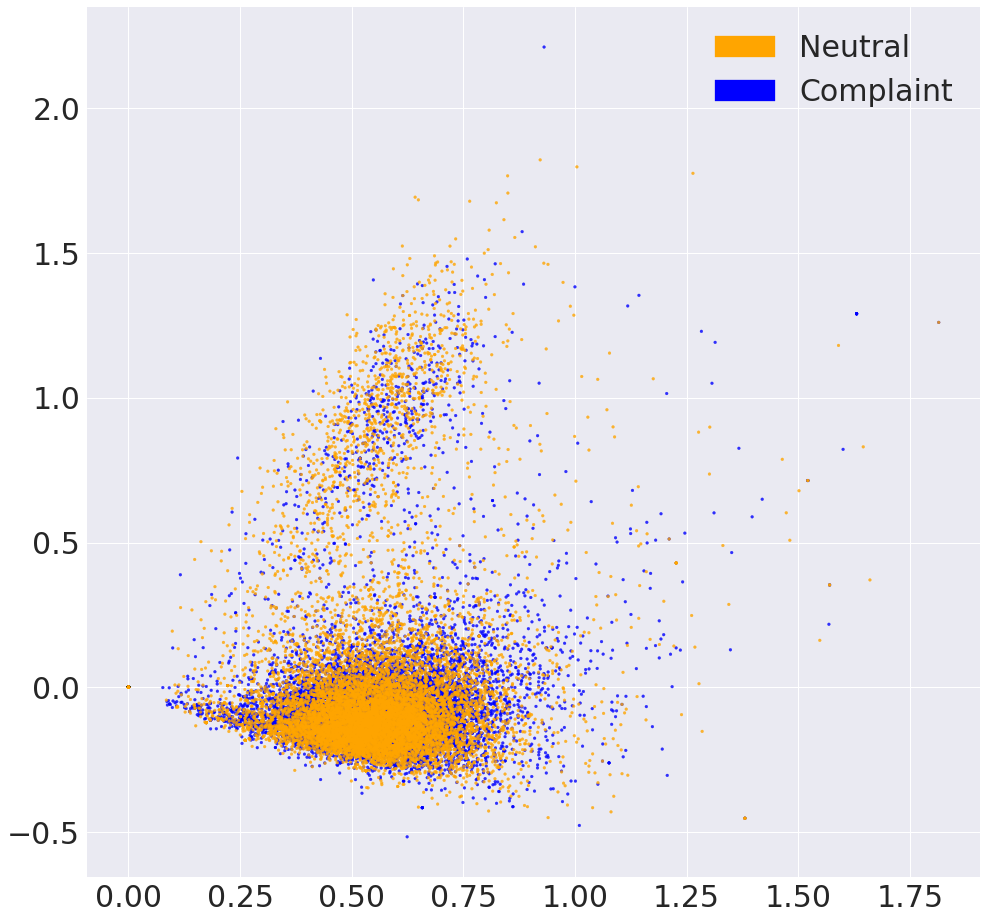

In [378]:

embeddings = get_word2vec_embeddings(word2vec, train_tweets)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

#test_tweet_frame = train_tweets[train_tweets['source'].isin(TestTwitters)]
#train_tweets['source'] = train_tweets['source'].str.replace('@@','@')
print(train_tweets['source'].unique())

import gensim
from gensim.test.utils import datapath, get_tmpfile,temporary_file
from gensim.models import KeyedVectors

word2vec_path = "/home/rcarns/flaskapps/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)



def read_corpus(tokenlist):
    for i,tweet in enumerate(tokenlist):
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(tweet), [i])
tweet_list = list(read_corpus(train_tweet_frame['text'].tolist()))
#print(tweet_list[:2])
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count = 0,epochs=40)
model.build_vocab(tweet_list)
    
    

%time model.train(tweet_list,total_examples=model.corpus_count,epochs=model.epochs)


ranks = []
second_ranks = []
for doc_id in range(len(tweet_list)):
    inferred_vector = model.infer_vector(tweet_list[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tweet_list[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tweet_list[sims[index][0]].words)))



# Pick a random document from the corpus and infer a vector from the model
doc_id = random.randint(0, len(tweet_list) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tweet_list[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tweet_list[sim_id[0]].words)))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Estimated number of clusters: 8


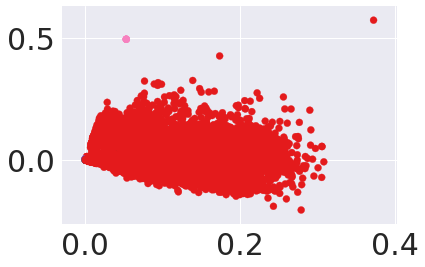

In [411]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice



db = cluster.DBSCAN(eps=.1, min_samples=3).fit(X_train_counts)
y_pred = db.labels_.astype(np.int)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
print(y_pred[:10])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
lsa = TruncatedSVD(n_components=2)
lsa.fit(X_train_counts)
lsa_scores = lsa.transform(X_train_counts)
plt.scatter(lsa_scores[:,0], lsa_scores[:,1],color=colors[y_pred])
plt.show()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


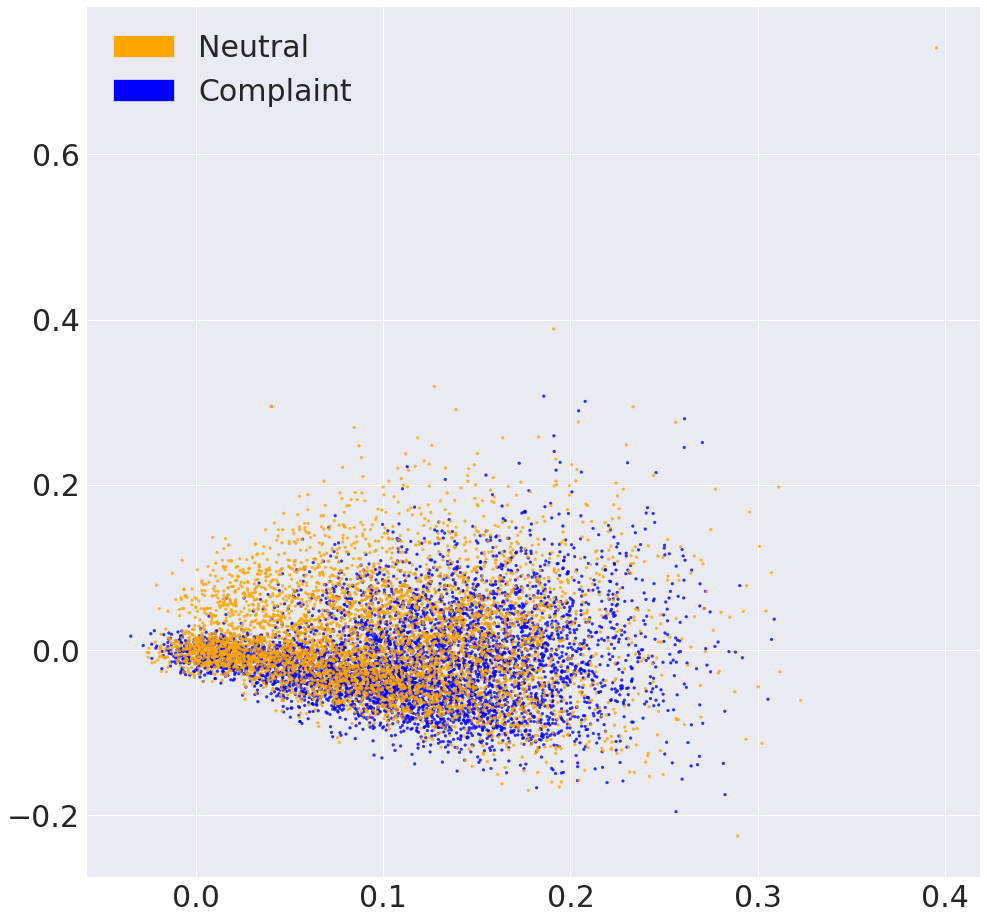

In [381]:


from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        print(color_column[:5])
        print(test_labels[:5])
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=color_column, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Neutral')
            green_patch = mpatches.Patch(color='blue', label='Complaint')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
#plot_LSA(X_train_counts, y_train)
plot_LSA(X_new,y_train)
plt.show()



In [314]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2',class_weight='balanced', solver='liblinear', 
                          multi_class='ovr', random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

logistic = LogisticRegression(solver='liblinear')#(C=1.0, penalty='l2',class_weight='balanced', solver='liblinear', 
                          #multi_class='ovr', random_state=40)

# Create regularization penalty space
penalty = ['l1','l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
clf = SVC()#SGDClassifier()
clf.fit(X_train_counts,y_train)
y_predicted_counts = clf.predict(X_test_counts)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
clf = MultinomialNB().fit(X_train_counts, y_train)
#clf = SVC(kernel='linear').fit(X_train_counts, y_train)
y_predicted_counts = clf.predict(X_test_counts)

n_right = 0
for i in range(len(y_predicted_counts)):
    if float(y_predicted_counts[i]) == y_test[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

In [ ]:
from sklearn.model_selection import GridSearchCV
#Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train_counts, y_train)

In [ ]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
y_proba = clf.predict_proba(tfidf_vectorizer.transform(train_tweets["text"].tolist()))



In [ ]:
for i in np.arange(10,20):
    print(train_tweets["trigram_text"][i],y_proba[i][1],train_tweets["class_label"][i])

Text(0.5,50,'Predicted')

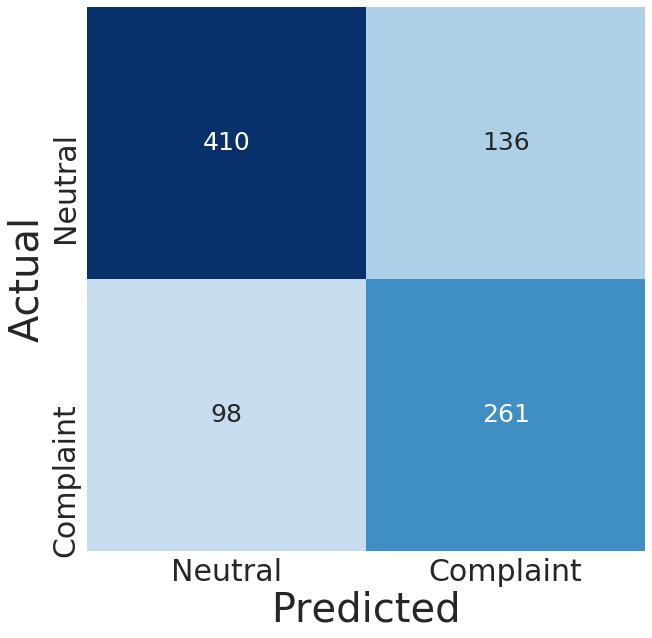

In [315]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted_counts)
confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#cmap='binary' switch to make it BW
fig,ax = plt.subplots(figsize=[10,10])
sn.set(font_scale=3)#for label size
sn.heatmap(confusion_matrix, annot=True,annot_kws={"size": 25},fmt='g', cmap='Blues',
           xticklabels=['Neutral','Complaint'],yticklabels=['Neutral','Complaint'],
          cbar=False,vmin=0,ax=ax)# font size)
plt.ylabel('Actual', fontsize=40)
plt.xlabel('Predicted', fontsize=40)

In [316]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.741, precision = 0.748, recall = 0.741, f1 = 0.743


In [317]:



#Extracting the top 20 most influencial features (aka words) from the model:
def show_most_informative_features(vect, clf, n=20):
    feature_names = vect.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tfidf_vectorizer, clf, n=20)




	-7.3233	via            		3.7565	hey            
	-2.6956	by             		3.3025	order          
	-2.4825	at             		3.1876	hi             
	-2.3102	confetti_via   		3.0630	help           
	-1.9941	sky            		2.9994	spotify        
	-1.9258	of             		2.8673	amazon         
	-1.8144	great          		2.5956	dm             
	-1.7262	game           		2.4556	dear           
	-1.6911	just_saw_this  		2.3580	app            
	-1.6841	on             		2.2428	customer_service
	-1.6303	metro_by       		2.0875	my_account     
	-1.6176	listen         		2.0459	chat           
	-1.5655	new            		2.0238	care           
	-1.5499	love           		1.9804	prime          
	-1.4802	plans          		1.9627	opt_out        
	-1.4460	99_via         		1.9593	i_have         
	-1.3556	stream         		1.9486	what_s         
	-1.3479	check_out      		1.9396	my             
	-1.3436	bid            		1.9118	info           
	-1.3347	y_all_are      		1.9023	delivery       


In [180]:
test_tweets = pd.read_csv('test_tweets.csv')
def clean_text(df,text_field):     
    # taken from 'How to Solve 90% of NLP Problems'      
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n\(\)]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    df = df.fillna('')
    return df
test_tweets = clean_text(test_tweets,'text')
list_corpus = test_tweets["text"].tolist()
list_corpus[:5]

['hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'had my first psl of the season, and someone paid it forward and purchased my afternoon treat  ',
 "hey  isn't it about time you sponsor your favorite starbucks drinker   hyungwon of kpop group    ",
 'hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'ohk i wanna try new drinks at  what s goodies ppl?']

In [52]:
import imp
import connections
import pickle
imp.reload(connections)
from sklearn.pipeline import make_pipeline
explainer = connections.ExplainTweet(train_tweets.loc[0,'text'])

exp = connections.ExplainTweet('this is ridiculous       been on hold almost 40 min and no one will help me')#test_tweets.loc[0,'text'])
#exp = explainer.explain_instance(tweet, c.predict_proba, num_features=6)

exp.save_to_file('exp.html')

#modelpickle = open('model.pkl','rb')
#[myclf,vectorizer] = pickle.load(modelpickle)
#modelpickle.close()
#foo = myclf.predict(vectorizer.transform(train_tweets['text'][:10]))
#print(foo)
#c = make_pipeline(vectorizer, myclf)
#foo = c.predict([train_tweets['text'][1]])
#print(foo)

/home/rcarns/anaconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


[('can', 0.037289216701030845), ('tour', 0.02954817084347131), ('headquarters', -0.028499491923166604), ('thing', 0.020170511465869605), ('minneapolis', 0.01943459794348699), ('is', 0.01738068789358676)]


/home/rcarns/anaconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


[('help', 0.09906978477007275), ('no', 0.039490824686490254), ('hold', 0.02759762128348664), ('this', 0.023582907477387397), ('been', 0.02335947213098265), ('40', 0.018877509948465137)]


In [189]:


# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#test_tweets['text'] = test_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
test_tweets.loc[:,"tokens"] = test_tweets.loc[:,"text"].apply(tokenizer.tokenize)

def tv(data):
    vectorizer = TfidfVectorizer()
    emb = vectorizer.fit_transform(data)
    return emb, vectorizer

test_tweets = test_tweets.dropna('rows','any')
test_list = test_tweets["text"].tolist()
test_corpus = tfidf_vectorizer.transform(test_list)

test_list[:5]

['hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'had my first psl of the season, and someone paid it forward and purchased my afternoon treat  ',
 "hey  isn't it about time you sponsor your favorite starbucks drinker   hyungwon of kpop group    ",
 'hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'ohk i wanna try new drinks at  what s goodies ppl?']

In [194]:
initial_tweets=pd.read_csv('test_tweets.csv')
y_result = clf.predict(test_corpus)
for i in range(len(y_result)):
    foo = tfidf_vectorizer.inverse_transform(test_corpus[i])
    bar = initial_tweets.loc[i,'text']
    if y_result[i] == 1:
        print(bar,y_result[i])
initial_tweets['result']=y_result
excel_writer = pd.ExcelWriter('StarbucksTest.xlsx')
initial_tweets.to_excel(excel_writer,'Sheet1')
excel_writer.save()
#for f in foo:
#    print(f)

#print(foo)

Hey @Starbucks, isn't it about time you sponsor your favorite Starbucks drinker - Hyungwon of Kpop group @OfficialMonstaX??? 😊 https://t.co/VvrElsW9Uk 1
#pumpkin spice Time is here ! @starbucks #almostskiseason #coffee #likefollie #listen https://t.co/3K8QdtwKqR @ Clearwater, Florida https://t.co/HIlKgxgXyV 1
I didn't specify hot and they didn't ask and I'm very sad because I have class and I couldn't wait for them to remake it. It doesn't even taste like a PSL. 😩 @starbucks @ Target Store Santa-Fe https://t.co/sjWwiqBi4L 1
GUYS I GOT MY STARBUCKS AND IT WAS GOLDEN HOUR TOO ☀️ I MUSTVE BEEN BLESSED CAUSE I TWEETED ABOUT @Starbucks EARLIER LOL 😂 https://t.co/lpkHJJsvBD 1
A year wiser and stronger! I am aging gracefully! What else is great on birthdays? Of course, #birthdayfreebies? I have long list of freebies and this is one of my favorites! I know, I am so easy to please. Thank you ⁦@Starbucks⁩ ☕️ #freebies #Birthday #birthdaygirl https://t.co/qNzPt6gzyf 1
Why do @Starbucks never have

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.799, precision = 0.814, recall = 0.799, f1 = 0.800


In [282]:
import gensim
from gensim.test.utils import datapath, get_tmpfile,temporary_file
from gensim.models import KeyedVectors

from gensim.scripts.glove2word2vec import glove2word2vec


#glove_path = "glove.twitter.27B.100d.txt"
#glove_file = datapath(glove_path)
#transform glove to word2vec
#with temporary_file("temp.txt") as tmp_file:
#    glove2word2vec(glove_path, tmp_file)
word2vec_path = "/home/rcarns/Untitled Folder/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
#word2vec = KeyedVectors.load_word2vec_format(word2vec_file)


In [283]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = train_tweets['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)


In [284]:


embeddings = get_word2vec_embeddings(word2vec, train_tweets)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


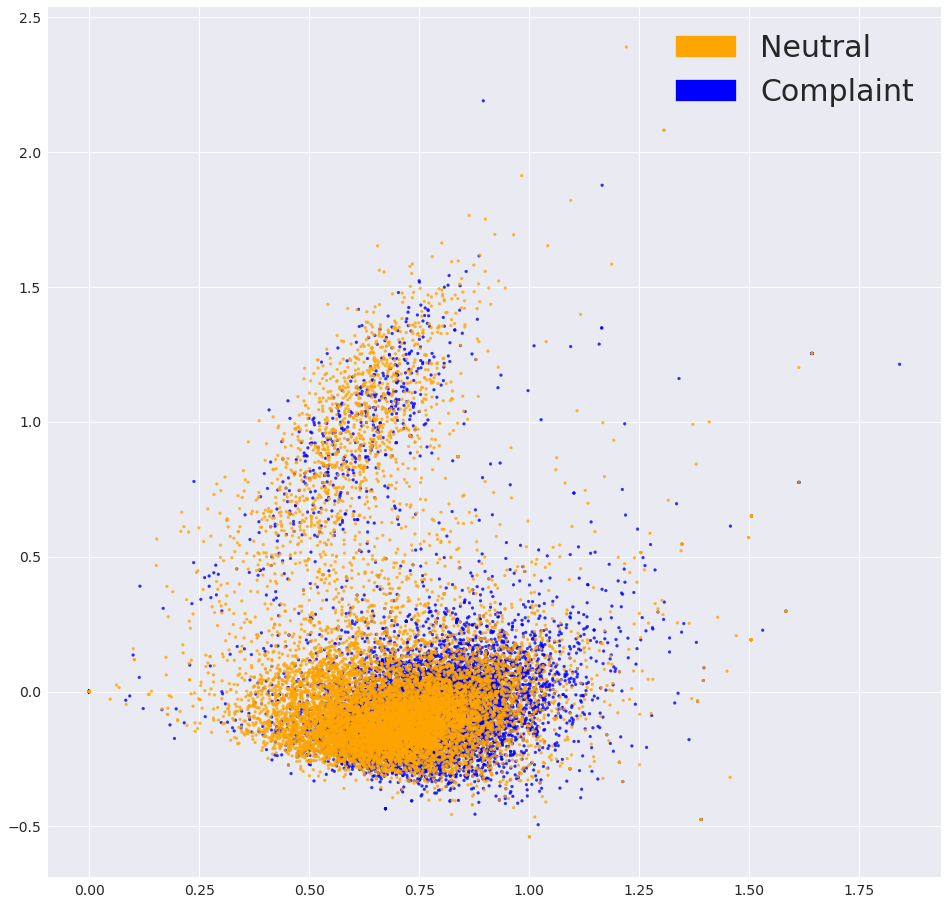

In [289]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [285]:
clf_w2v = LogisticRegression(C=1.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [286]:


accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))



accuracy = 0.683, precision = 0.690, recall = 0.683, f1 = 0.683


In [290]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
clf_w2v = MultinomialNB().fit(X_train_word2vec, y_train_word2vec)
#clf = SVC(kernel='linear').fit(X_train_counts, y_train)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

n_right = 0
for i in range(len(y_predicted_word2vec)):
    if float(y_predicted_word2vec[i]) == y_test_word2vec[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_word2vec)) * 100)))

ValueError: Input X must be non-negative

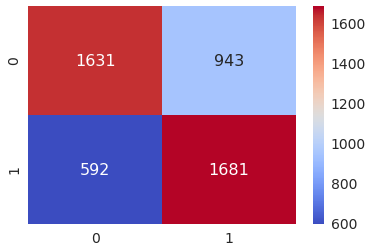

In [287]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#cmap='binary' switch to make it BW
sn.set(font_scale=1.4)#for label size
sn.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16},fmt='g', cmap='coolwarm')# font size)

In [81]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_tweets["text"].tolist())
sequences = tokenizer.texts_to_sequences(train_tweets["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(train_tweets["class_label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 31068 unique tokens.
(31069, 300)


In [89]:
from keras.layers import Dense, Input, Flatten, Dropout,Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [90]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(train_tweets["class_label"].unique())), False)

In [91]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Train on 13895 samples, validate on 3473 samples
Epoch 1/3
13895/13895 [==============================] - 18s 1ms/step - loss: 0.5477 - acc: 0.7213 - val_loss: 0.4705 - val_acc: 0.7662
Epoch 2/3
13895/13895 [==============================] - 17s 1ms/step - loss: 0.4309 - acc: 0.7901 - val_loss: 0.4583 - val_acc: 0.7691
Epoch 3/3
13895/13895 [==============================] - 18s 1ms/step - loss: 0.3945 - acc: 0.8127 - val_loss: 0.4499 - val_acc: 0.7803
